In [1]:
# packages importeren 
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 200)

In [3]:
# dataset inladen en omzetten in pandas dataframe
df = pd.read_csv('klachten.csv')
# Target variable definiëren
y = df['Product']

In [5]:
# Train-test split
train_df, test_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=y
)

## Basis analyse

In [6]:
# Aantal kolommen en rijen in de train dataset
train_df.shape
print("De dataset bevat {} rijen en {} kolommen.".format(train_df.shape[0], train_df.shape[1]))

De dataset bevat 10420 rijen en 5 kolommen.


In [7]:
# Eerste vijf rijen van de trainingsset bekijken
train_df.head().T

,8835,6482,12354,2315,6740
ID,1580972,1691558,1776634,1387917,1522980
Datum_ontvangst,2023-09-25,2023-12-10,2024-02-07,2023-05-21,2023-08-17
Product,Incasso,Hypotheek,Kredietregistratie,Consumentenkrediet,Hypotheek
Omschrijving,"i have just received a copy of my credit report, it states that I had a judgment against me in XX/XX/2014. I do not know how I got this judgement against me as I was never given a notice to appear in court.","Paid {$420.00} for appraisal on home based upon rates that were originally quoted for a mortgage from Finance of America Mortgage dba XXXX XXXX. When documents for mortgage were provided the quoted rates were higher by XXXX. I elected to go to a different broker/lender ( XXXX a division of XXXX XXXX XXXX , XXXX ) and requested appraisal to be transferred since I paid for it. XXXX XXXX did not respond for several weeks and when they did they were uncooperative and would not provide necessary paperwork.",TransUnion is reporting a XXXX XXXX on my credit report. This transaction was not initiated by myself it was a towed vehicle that was sold by myself. \n\nTransunion and finex group have no standing in reporting anything on my credit report since this was not initiated by me.,"To begin with, prior to entering into a vehicle loan agreement with TDAuto Fiance in conjunction with XXXX, my previous vehicle was stolen during my XXXX in College and at a Part-Time Job ( XXXX per week ). I was in dire need of a vehicle because of the high demand of my day-to-day daily hassle of being a XXXX student. Unknowingly, I was giving a 2010 Ford Fusion that had a history of XXXX accidents, which the bank or TDAuto Finance was unaware of during the time of sale. In other words, in my part without due diligence, I was lead to believe that the loan value uphold the same book value of the vehicle at the time it was purchased. Moreover, in my attempt to travel abroad, I have been unsuccessful in many ways to obtain a new owner because of the validity and lack of integrity of the sale that was made to me. As a result, I have been left to voluntarily surrender the vehicle to auction ; otherwise, repossession, which is a mark that will hinder my credit report negatively impacting my credit score.",PNC Mortgage sent {$1500.00} to an insurance company in XX/XX/XXXX and then sent another payment to another insurance company in XX/XX/XXXX fro {$1300.00} and then another payment in XX/XX/XXXX for {$1400.00}. \n\nSome one was XXXX paid and they ca n't / wo n't tell me how to get my money back!
Antwoord_bedrijf,Closed with explanation,Closed with explanation,Closed with non-monetary relief,Closed with non-monetary relief,Closed with explanation


In [8]:
# stats numerieke variabelen 
stats_num = train_df.describe(include='int64').T.reset_index().T
stats_num

,0
index,ID
count,10420.0
mean,1903638.179846
std,343030.991485
min,1290157.0
25%,1600478.75
50%,1922963.5
75%,2208302.75
max,2543247.0


In [9]:
# stats categorische variabelen 
stats_cat = train_df.describe(include='object').T.reset_index()
stats_cat

,index,count,unique,top,freq
0,Datum_ontvangst,10420,770,2024-05-03,31
1,Product,10420,6,Incasso,2865
2,Omschrijving,10420,10381,"I am filing this complaint because Experian has ignored my request to provide me with the documents that their company has on file that was used to verify the accounts I disputed. Being that they have gone past the 30 day mark and can not verify these accounts, under Section 611 ( 5 ) ( A ) of the FCRA - they are required to "" ... promptly delete all information which can not be verified '' that I have disputed. Please resolve this manner as soon as possible. Thank you.",9
3,Antwoord_bedrijf,10420,5,Closed with explanation,8155


- Op 3 mei 2024 zijn de meeste klachten ingediend: 31 klachten 
<br>

- De productsector 'Incasso' heeft de meeste klachten: 2865
<br>
- Er zijn dubbele waarden in de kolom 'Omschrijving': er hoort eigenlijk geen omschrijving-tekst te zijn die vaker van 1 keer voorkomt. 
<br>
- "Closed with explanation" is het meest voorkomende antwoord van het bedrijf op een klacht: 8155 keer

In [10]:
print("Aantal categorische kolommen:", train_df.select_dtypes(include='object').shape[1])
print("Aantal numerieke kolommen:", train_df.select_dtypes(include=['int64', 'float64']).shape[1])

Aantal categorische kolommen: 4
Aantal numerieke kolommen: 1


ID voegt geen voorspellende waarde toe. TODO: droppen ID kolom 

In [11]:
# Datatypes en null-waarden in de trainingsset bekijken
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10420 entries, 8835 to 12191
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                10420 non-null  int64 
 1   Datum_ontvangst   10420 non-null  object
 2   Product           10420 non-null  object
 3   Omschrijving      10420 non-null  object
 4   Antwoord_bedrijf  10420 non-null  object
dtypes: int64(1), object(4)
memory usage: 488.4+ KB


Er zitten geen nullwaardes in de trainset. Alle variabelen behalve ID zijn van het object type (tekst)

## Analyses per feature

#### `Product` feature

In [12]:
# Verdeling van de Product-sectoren in de trainingsset
train_df['Product'].value_counts()

Product
Incasso               2865
Hypotheek             2320
Kredietregistratie    2211
Creditcard            1319
Bankrekening          1042
Consumentenkrediet     663
Name: count, dtype: int64

Text(0.5, 1.0, 'Aantal klachten per product sector')

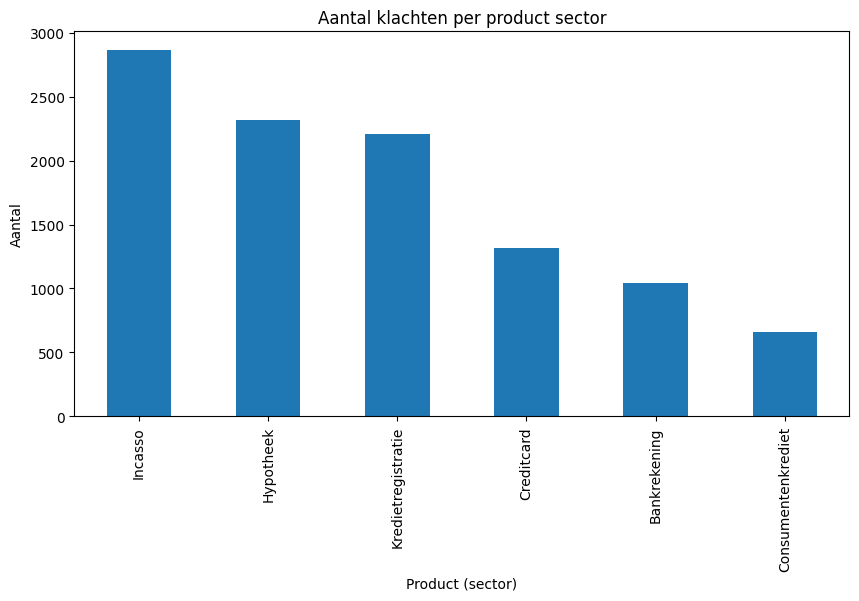

In [13]:
counts_product = train_df['Product'].value_counts() # tellen hoeveel klachten per product sector

# plotten barchart 
ax = counts_product.plot(kind='bar', figsize=(10,5))
ax.set_xlabel("Product (sector)")
ax.set_ylabel("Aantal")
ax.set_title("Aantal klachten per product sector")

De sector met de meeste klachten in de trainset is 'Incasso'

#### `Omschrijving` feature

In [14]:
# Statistische informatie over de lengte van de klachtenbeschrijvingen
exploratie_df = train_df.copy()
exploratie_df['len'] = exploratie_df['Omschrijving'].str.len()
exploratie_df['len'].describe().round(2)

count    10420.00
mean      1016.16
std        910.31
min         12.00
25%        375.00
50%        709.00
75%       1354.00
max      10761.00
Name: len, dtype: float64

In [15]:
# Gemiddelde lengte van klachtenbeschrijvingen per product sector
exploratie_df.groupby('Product')['len'].mean().round(2)

Product
Bankrekening          1205.74
Consumentenkrediet    1059.79
Creditcard            1130.99
Hypotheek             1426.86
Incasso                770.72
Kredietregistratie     732.31
Name: len, dtype: float64

In [16]:
# Aantal duplicaten in omschrijving tellen
train_df['Omschrijving'].duplicated().sum()

np.int64(39)

In [17]:
# Rijen met duplicaten selecteren
explore_duplicates = train_df.loc[
    train_df['Omschrijving'].duplicated(keep=False)
].copy()

# Sorteren zodat de duplicates bij elkaar staan 
explore_duplicates = explore_duplicates.sort_values('Omschrijving')

explore_duplicates

,ID,Datum_ontvangst,Product,Omschrijving,Antwoord_bedrijf
12143,2152667,2024-10-08,Kredietregistratie,Experian is not responding to my requests to investigate and remove accounts that do not belong to me from my credit report.,Closed with explanation
13552,2096759,2024-09-07,Kredietregistratie,Experian is not responding to my requests to investigate and remove accounts that do not belong to me from my credit report.,Closed with explanation
12663,2362106,2025-02-27,Kredietregistratie,I am a victim of identity theft. There is Fraudulent Information on Credit Reports which were made without my knowledge or permission. \nBut Credit Bureaus have failed to give me investigation result,Closed with explanation
13124,2361993,2025-02-27,Kredietregistratie,I am a victim of identity theft. There is Fraudulent Information on Credit Reports which were made without my knowledge or permission. \nBut Credit Bureaus have failed to give me investigation result,Closed with explanation
14408,2041468,2024-08-02,Kredietregistratie,"I am filing this complaint because Equifax has ignored my request to provide me with the documents that their company has on file that was used to verify the accounts I disputed. Being that they have gone past the 30 day mark and can not verify these accounts, under Section 611 ( 5 ) ( A ) of the FCRA - they are required to "" ... promptly delete all information which can not be verified '' that I have disputed. Please resolve this manner as soon as possible. Thank you.",Closed with explanation
...,...,...,...,...,...
10536,1403881,2023-06-03,Incasso,"This debt is not known to me. I recently requested my Free Credit reports to access my credit history before I applied for my XXXX mortgage which I have been diligently addressing my credit so that i would be in a good position when ready so I request full validation from the crediting company. This request is for more than just a simple statement without detail. Rather, I must requisition a careful documentation, including statements, contracts, copies of checks, and any other pertinent information.",Closed with explanation
14599,1510127,2023-08-09,Kredietregistratie,"While checking my personal credit report, I noticed an unauthorized and fraudulent credit inquiry made by XXXX on or about XX/XX/XXXX on Experian. I did not authorized anyone employed by this company to make any inquiry and view my credit report. XXXX has violated the Fair Credit Reporting Act Section 1681b ( c ). They were not legally entitled to make this fraudulent inquiry. This is a serious breach of my privacy rights. \nI have requested that they mail me a copy of my signed authorization form that gave them the right to view my credit within five ( 5 ) business days so that I can verify its validity and advised them that if they can not provide me with proof that I authorized them to view my credit report then I am demanding that they contact the credit bureaus immediately and have them remove the unauthorized and fraudulent hard inquiry immediately. I also requested that they remove my personal information from their records. My Social Security # is XXXX and my Date of Birth is XX/XX/XXXX in case it is needed to locate the fraudulent inquiry in their system.",Closed with non-monetary relief
13778,1509808,2023-08-08,Kredietregistratie,"While checking my personal credit report, I noticed an unauthorized and fraudulent credit inquiry made by XXXX on or about XX/XX/XXXX on Experian. I did not authorized anyone employed by this company to make any inquiry and view my credit report. XXXX has violated the Fair Credit Reporting Act Section 1681b ( c ). They were not legally entitled to make this fraudulent inquiry. This is a serious breach of my privacy rights. \nI have requested that they mail me a copy of my signed authorization form that gave them the right to view my credit within five ( 5 ) business days so that I can verify its validity and advised them that if they can not provide me with proof that I aut

Twee rijen hebben exact dezelfde omschrijving (zie afbeelding), maar zijn gecategoriseerd met verschillende productsectoren. Dat kan wijzen op verkeerd gelabelde data. TODO: Onderzoeken/navragen bij opdrachtgever


#### `Antwoord_bedrijf` feature

In [18]:
train_df['Antwoord_bedrijf'].value_counts()

Antwoord_bedrijf
Closed with explanation            8155
Closed with non-monetary relief    1207
Closed with monetary relief         735
Closed                              251
Untimely response                    72
Name: count, dtype: int64

#### `Datum_ontvangst` feature

In [19]:
# datum string omzetten naar datetime
train_df['Datum_ontvangst'] = pd.to_datetime(train_df['Datum_ontvangst'])

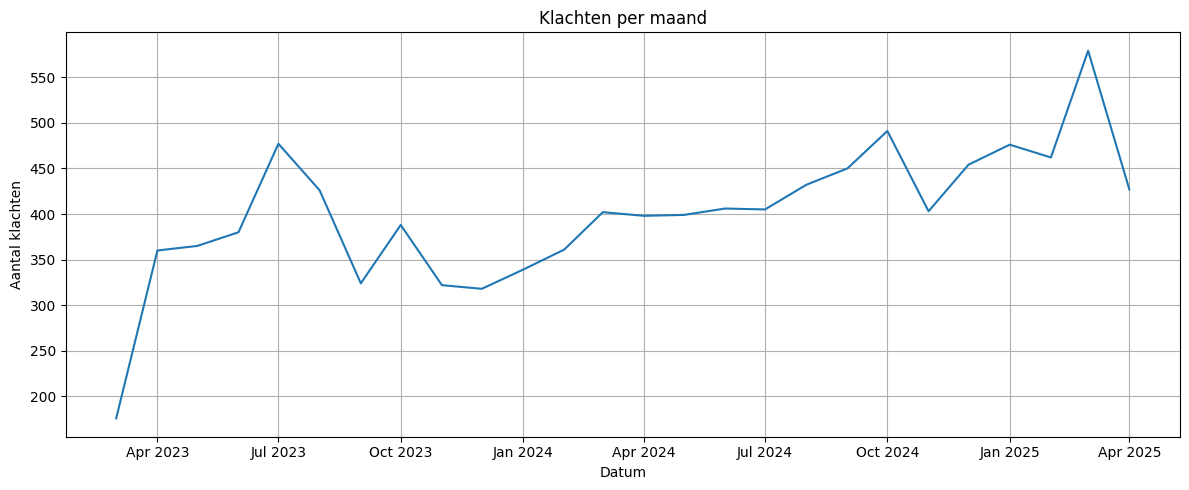

In [20]:
counts = train_df.groupby(train_df['Datum_ontvangst'].dt.to_period('M')).size() # groeperen op jaar-maand en aantallen per maand tellen 
counts.index = counts.index.to_timestamp() 

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(counts.index, counts.values)

# maand - jaar labels 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Klachten per maand")
plt.xlabel("Datum")
plt.ylabel("Aantal klachten")
plt.grid(True)
plt.tight_layout()
plt.show()

Het aantal klachten per maand schommelt, maar de grafiek laat wel een stijging in de loop van de tijd zien. 

Er zijn vier momenten waarop het aantal klachten omhoog schiet: in juli 2023, oktober 2023, oktober 2024 en rond maart 2025.  

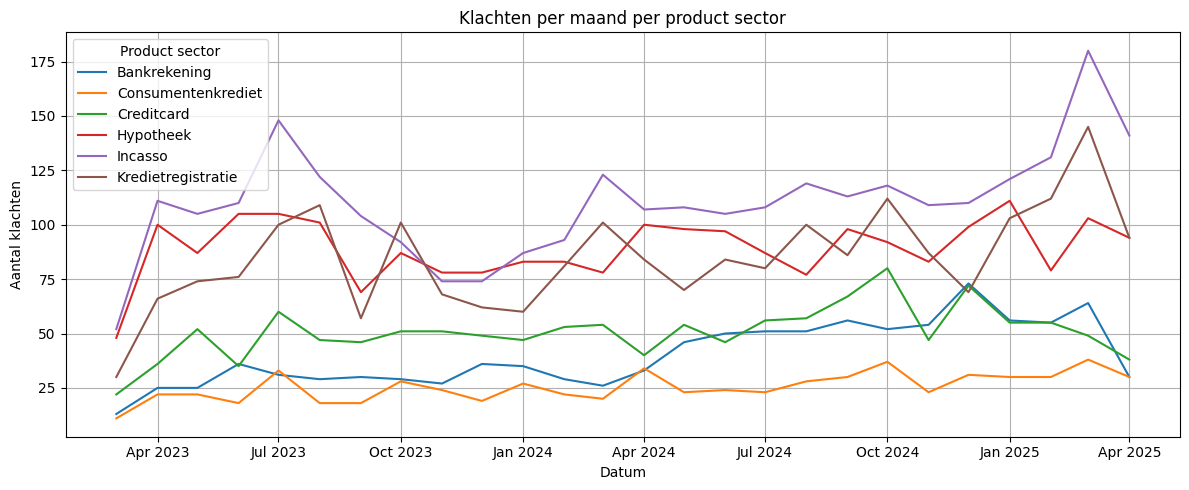

In [21]:
# groeperen per maand en per product sector
counts_sector = (
    train_df.groupby([train_df['Datum_ontvangst'].dt.to_period('M'), 'Product']).size().unstack(fill_value=0))

# index terugzetten naar timestamp 
counts_sector.index = counts_sector.index.to_timestamp()

fig, ax = plt.subplots(figsize=(12,5))

for sector in counts_sector.columns:
    ax.plot(counts_sector.index, counts_sector[sector], label=sector)

# Labels en titel
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # maand - jaar labels 
plt.title("Klachten per maand per product sector")
plt.xlabel("Datum")
plt.ylabel("Aantal klachten")
plt.legend(title="Product sector")
plt.grid(True)
plt.tight_layout()
plt.show()

Incasso is duidelijk de grootste bron van klachten. Daarna volgen hypotheek en kredietregistratie. De andere productgroepen hebben het laagste aantal maandelijkse klachten. 

Kredietregistratie en incasso laten een vergelijkbaar patroon zien: hun pieken en dalen liggen vaak dicht bij elkaar. Mogelijk hebben de klachten dezelfde of een soortgelijke oorzaak. 